In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.warnings.filterwarnings('ignore')

The Stanford Open Policing dataset is capable of addressing potential inequities in traffic stops as it contains data from numerous states with records ranging from 13,000 to 31,000,000. Originally we wanted to analyze state wide police stops in California, however the dataset was too large and would require more computing power to work on it efficiently. We decided to do our EDA on the county of San Diego and the dataset had many of the features that we wanted to analyze such as subject age, race, gender, reason for stop, citation issued, warning issued, search conducted, etc. There are also other datasets from other counties and states that we can perform similar EDA on if we wanted to analyze a different area or compare it to San Diego police stops. We believe that the Stanford Open Policing dataset has more than enough data to address potential inequities in traffic stops, whether it be in a more focused area such as a county, statewide, or with sufficient computing power, country-wide.

In [2]:
data = pd.read_csv('ca_san_diego_2020_04_01.csv').drop('raw_row_number', axis=1)
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,outcome,contraband_found,search_conducted,search_person,search_vehicle,search_basis,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,WHITE
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,warning,NaN,False,False,False,NaN,NaN,Moving Violation,Verbal Warning,LAOTIAN
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,WHITE
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Equipment Violation,Citation,HISPANIC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383022,NaN,NaN,620,NaN,NaN,NaN,vehicular,NaN,True,True,citation,NaN,False,False,False,NaN,NaN,NA|Equipment Violation|NA|NA|NA|NA|NA|Moving V...,Verbal Warning|NA|Citation|Citation|NA|NA|NA|C...,NaN
383023,NaN,NaN,710,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,NA|Moving Violation,NA|Citation,NaN
383024,2014-12-22,NaN,720,NaN,NaN,NaN,vehicular,False,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation,NaN
383025,NaN,NaN,810,NaN,NaN,NaN,vehicular,NaN,True,False,citation,NaN,False,False,False,NaN,NaN,Moving Violation,Citation|NA,NaN


In [3]:
from datetime import datetime

data = data.dropna(subset=['date', 'subject_sex'])
data['year'] = data.date.apply(lambda x: str(x)[:4])
data['hour'] = data.time.apply(lambda x: str(x)[:2])
monthDict={'01':'Jan', '02':'Feb', '03':'Mar', '04':'Apr', '05':'May', '06':'Jun', '07':'Jul', '08':'Aug', '09':'Sep', '10':'Oct', '11':'Nov', '12':'Dec'}
data['month#'] =  data.date.apply(lambda x: str(x)[5:7])#.replace(monthDict) #data['month'] =
data['monthName'] =  data.date.apply(lambda x: str(x)[5:7]).replace(monthDict) #data['month']
data['monthYr'] = data['month#'].map(str)+ '-' +data['year'].map(str)
data['monthYr'] = pd.to_datetime(data['monthYr'], format='%m-%Y').dt.strftime('%m-%Y')
# define the threshhold or our age groups
age_groups = [0, 11, 17, 25, 35, 45, 55, 65, 100]

# Giving age bins labels
age_group_names = ['<11', '11-17', '17-25', '25-35', '35-45', '45-55', '55-65', '>65']

data['subject_age_group'] = pd.cut(
    data['subject_age'], bins=age_groups, labels=age_group_names)



In [4]:
data

,date,time,service_area,subject_age,subject_race,subject_sex,type,arrest_made,citation_issued,warning_issued,...,reason_for_search,reason_for_stop,raw_action_taken,raw_subject_race_description,year,hour,month#,monthName,monthYr,subject_age_group
0,2014-01-01,01:25:00,110,24.0,white,male,vehicular,False,True,False,...,NaN,Moving Violation,Citation,WHITE,2014,01,01,Jan,01-2014,17-25
1,2014-01-01,05:47:00,320,42.0,white,male,vehicular,False,False,True,...,NaN,Moving Violation,Verbal Warning,WHITE,2014,05,01,Jan,01-2014,35-45
2,2014-01-01,07:46:00,320,29.0,asian/pacific islander,male,vehicular,False,False,True,...,NaN,Moving Violation,Verbal Warning,LAOTIAN,2014,07,01,Jan,01-2014,25-35
3,2014-01-01,08:10:00,610,23.0,white,male,vehicular,False,True,False,...,NaN,Moving Violation,Citation,WHITE,2014,08,01,Jan,01-2014,17-25
4,2014-01-01,08:35:00,930,35.0,hispanic,male,vehicular,False,True,False,...,NaN,Equipment Violation,Citation,HISPANIC,2014,08,01,Jan,01-2014,25-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
383003,2015-04-15,NaN,320,29.0,asian/pacific islander,female,vehicular,False,NaN,NaN,...,NaN,Moving Violation,NaN,ASIAN INDIAN,2015,na,04,Apr,04-2015,25-35
383004,2014-10-17,NaN,310,33.0,NaN,female,vehicular,False,True,False,...,NaN,Moving Violation,Citation,NaN,2014,na,10,Oct,10-2014,25-35
383005,2014-10-21,NaN,310,NaN,NaN,female,vehicular,False,True,False,...,NaN,NaN,Citation,NaN,2014,na,10,Oct,10-2014,NaN
383006,2014-10-21,NaN,310,34.0,NaN,male,vehicular,False,True,False,...,NaN,NaN,Citation,NaN,2014,na,10,Oct,10-2014,25-35


This bar graph indicates that it is mostly individuals in their 20s and 30s that are getting stopped. Does not imply that older people are less likely to be stopped as we do not know the population of drivers by age.

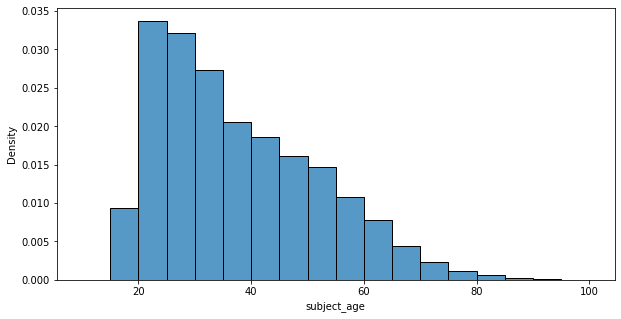

In [5]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=data, x='subject_age', binwidth=5, stat='density');

This bar graph indicates that white individuals are getting stopped the most, however we don't know if this is because there are more white drivers on the road or if they are simply more likely to get pulled over.

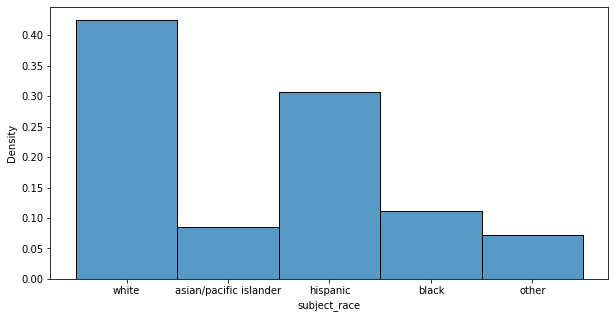

In [6]:
fig, axes = plt.subplots(1, 1, figsize=(10, 5))
sns.histplot(data=data, x='subject_race', stat='density');

It appears that men are getting pulled over at a higher clip than women, however we don't know if it is because there are more men on the road or if they are simply more likely to be pulled over.

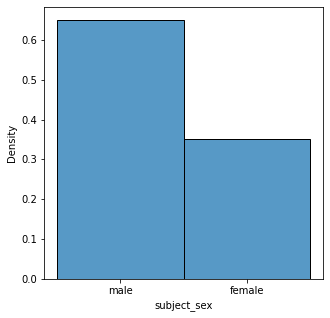

In [7]:
fig, axes = plt.subplots(1, 1, figsize=(5, 5))
sns.histplot(data=data, x='subject_sex', stat='density');

It appears that across all races white individuals are getting pulled over the most, with hispanic individuals getting pulled over the second most.

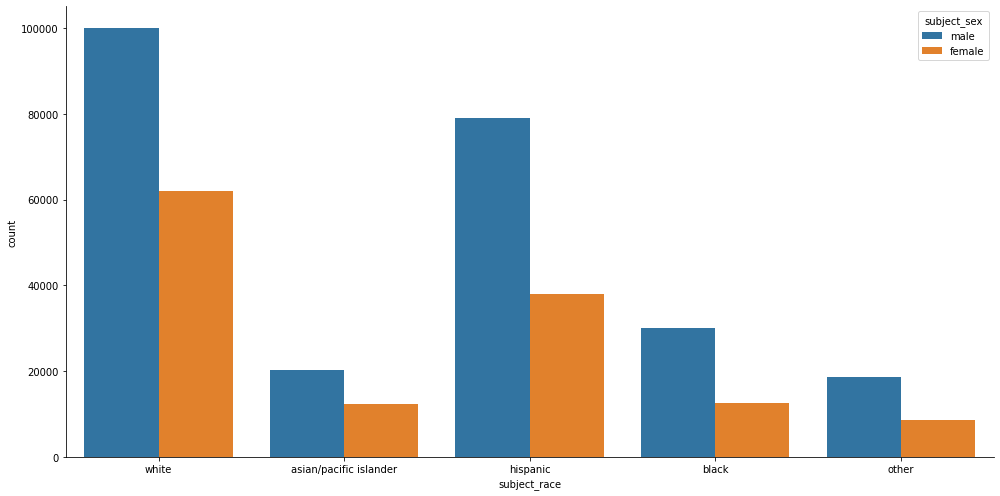

In [8]:
pivot = data.pivot_table(index = 'subject_race', columns ='subject_sex' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_race', hue="subject_sex", 
          data=data, 
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);


The bar plot shows that from 2014 to 2016 police stops for white individuals were decreasing, however the dataset was only partially filled throughout 2017 so the extremely low number of stops in 2017 is misleading.

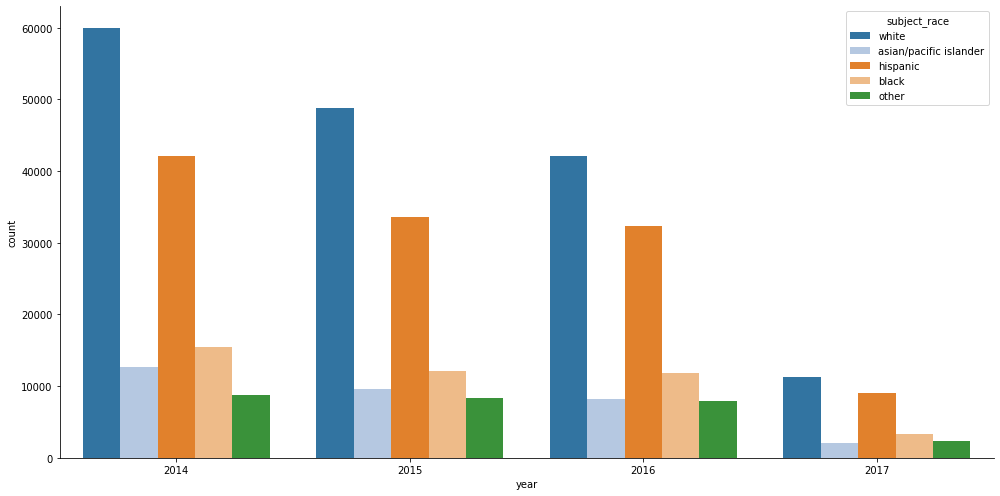

In [9]:
pivot = data.pivot_table(index = 'year', columns ='subject_race' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='year', hue="subject_race", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);

It appears that the distribution of citations and warnings per race are similar. Arrests also seems to follow a similar distribution at a much smaller count.

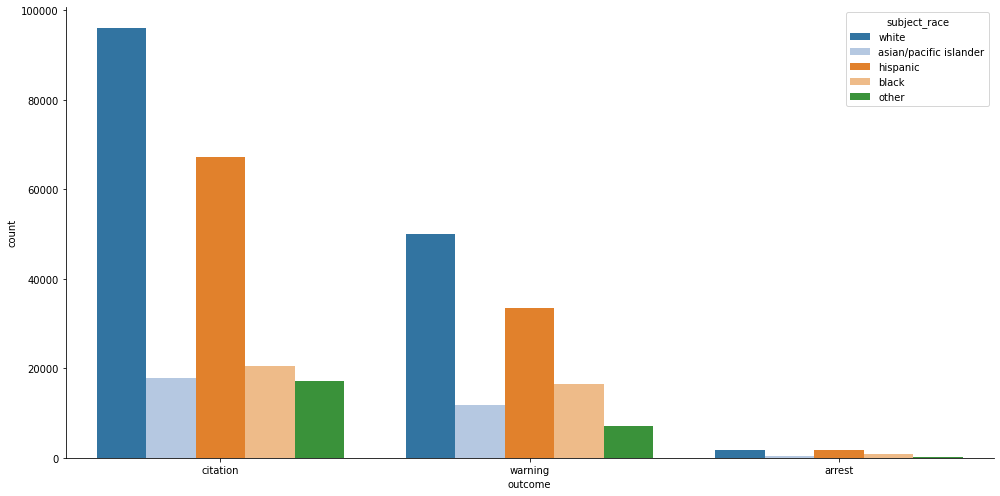

In [10]:
pivot = data.pivot_table(index = 'outcome', columns ='subject_race' ,
                       aggfunc = 'count', values = 'year').fillna(0)

g = sns.catplot(x='outcome', hue="subject_race", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);

From the bar plot it appears that for all age groups white indivuals are the most stopped while individuals from ages 25-35 are the most stopped overall.

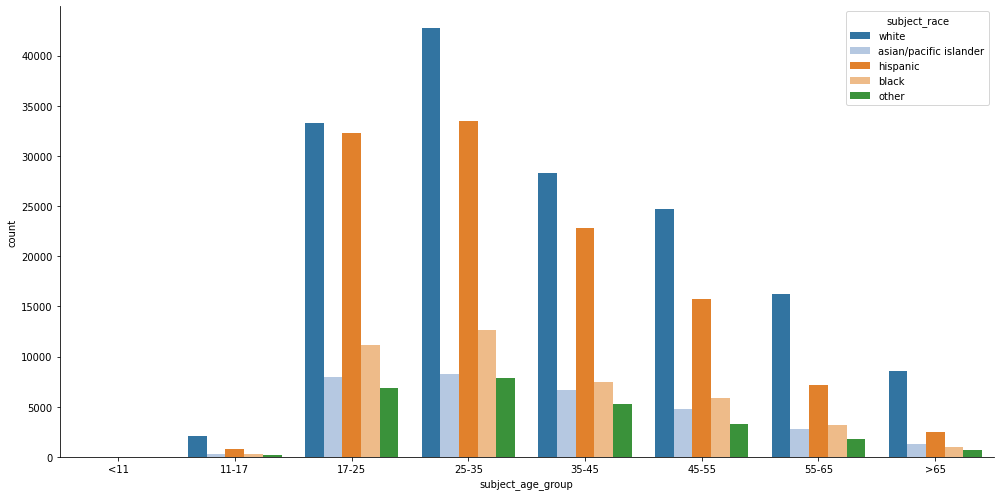

In [11]:
pivot = data.pivot_table(index = 'subject_age_group', columns ='subject_race' ,
                       aggfunc = 'count', values = 'outcome').fillna(0)

g = sns.catplot(x='subject_age_group', hue="subject_race", 
          data=data, palette='tab20',
            kind="count", height=7, aspect=2, orient = "h", legend = True, legend_out = False);

It appears that hispanic individuals were most searched under the basis 'other', however it appears that 'other' was the most common basis regardless of race.

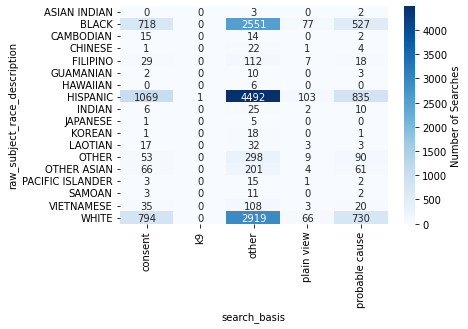

In [12]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_basis' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Searches'});

It seems that most individuals that were stopped did not have their vehicle searched, however hispanic individuals get their vehicle searched more than white individuals. This is an interesting observation as hispanic individuals are in total stopped less than white individuals but get their vehicle searched more often.

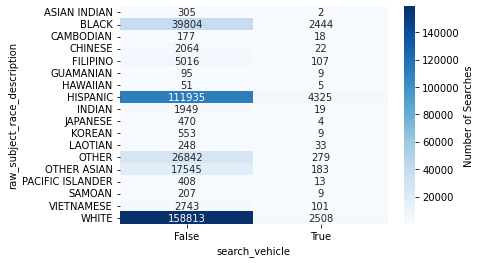

In [13]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_vehicle' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Searches'});

It seems that most individuals that were stopped were not searched, however hispanic individuals did get personally searched more than white individuals. This is an interesting observation as hispanic individuals are in total stopped less than white individuals but get searched more often.

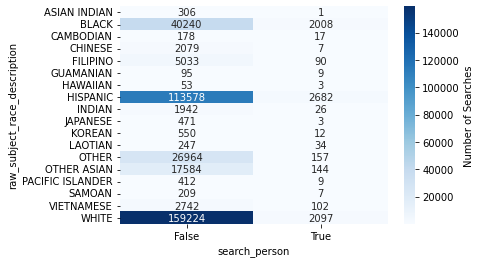

In [14]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='search_person' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Searches'});

It seems that in total most white individuals that were stopped received a citation, the second most were hispanic individuals taht received a citation, and the third most were white individuals that received a warning. It is interesting to see that both white and hispanic individuals are arrested at similar counts, and white individuals receive more warnings than hispanic individuals. I think in the future if we normalized this data it would give us a better picture of the rates at which these outcomes are happening.

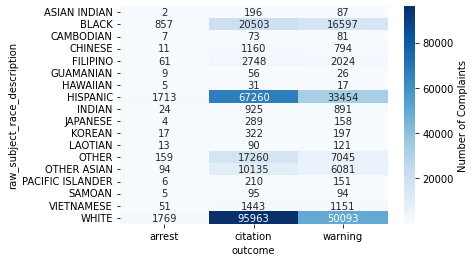

In [15]:
pivot = data.pivot_table(index = 'raw_subject_race_description', columns ='outcome' ,
                       aggfunc = 'count', values = 'subject_sex').fillna(0)#.div(len(df.index)).mul(100)

ax = sns.heatmap(pivot, annot=True, cmap="Blues", fmt='g', cbar_kws={'label': 'Number of Complaints'});

It appears that the distribution of drivers based on age is similar across races, with most being in their 20s and 30s.

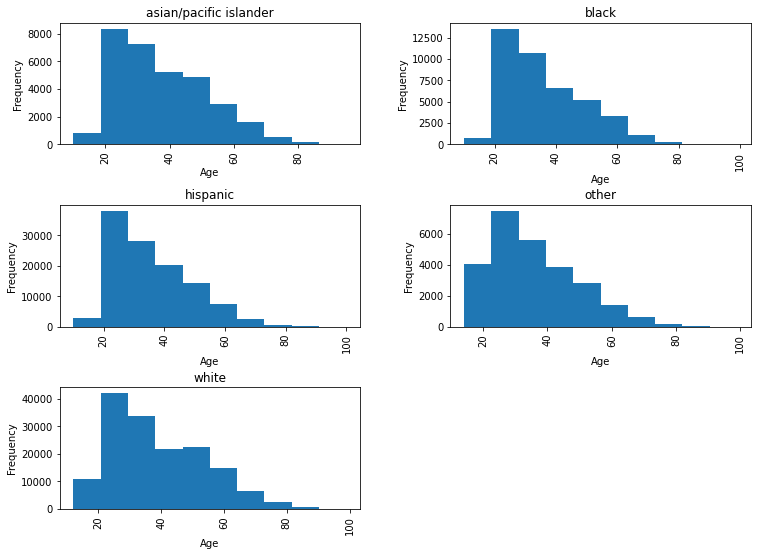

In [16]:
# Plotting the distribution of complaints for age_incident in both complainant and MOS for each MOS ethnicity
axarr = data[['subject_age']].hist(by=data['subject_race'], figsize =(12,9));
#plt.suptitle("Frequency of Age Incident in Both Complainant and Officer's for Each Officer's Ethnicity", 
#             ha='center', fontsize='xx-large');
for ax in axarr.flatten():
    ax.set_xlabel("Age")
    ax.set_ylabel("Frequency")

It appears that males and females are being stopped at a similar rate relative to their age where x is the age and y is the density.

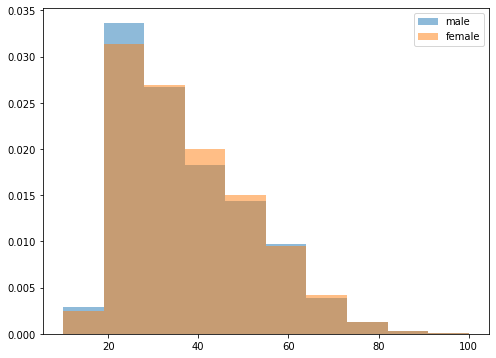

In [17]:
data['subject_sex'] = data['subject_sex'].astype(str)
plt.figure(figsize=(8,6))
plt.hist(data[data['subject_sex'] == 'male'].subject_age, alpha=0.5, label="male", density=True)
plt.hist(data[data['subject_sex'] == 'female'].subject_age, alpha=0.5, label="female", density=True)
plt.legend(loc='upper right')
plt.show()

This bar plot shows that mostly white men are being stopped with hispanic men and white females following behind where y is the individual w.r.t gender and race and x is the density

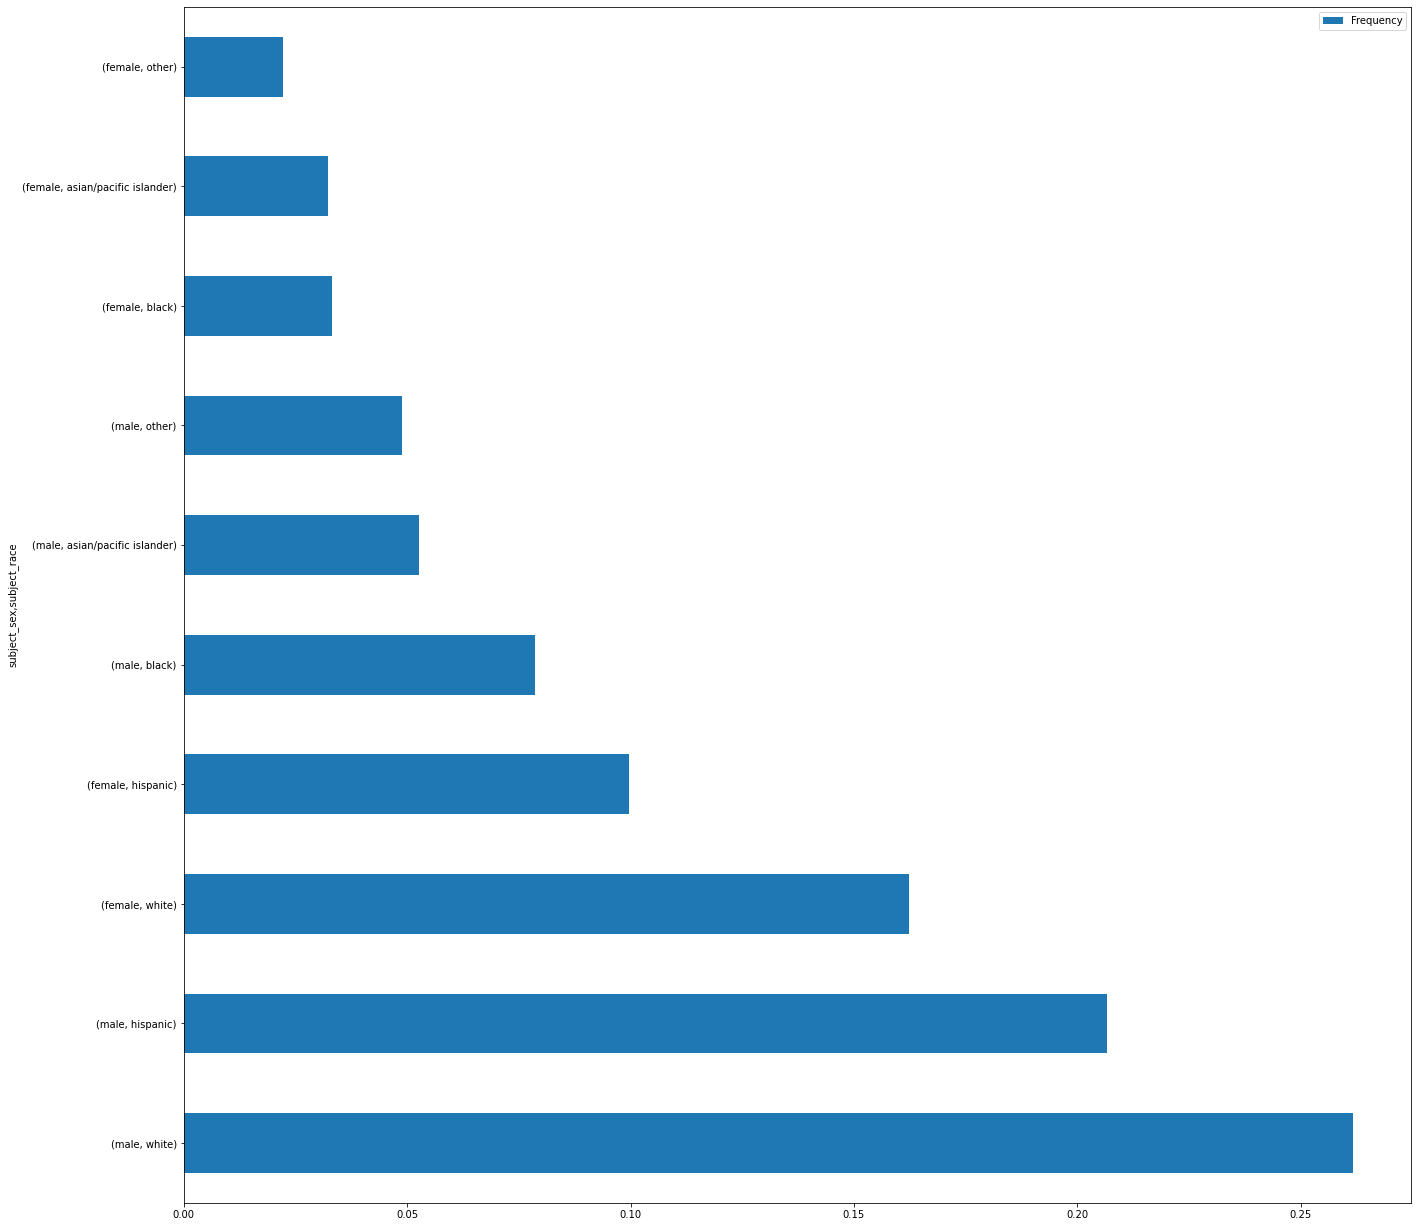

In [18]:
data['Frequency'] = 1
freq_target = data[['subject_sex', 'subject_race', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_sex', 'subject_race']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));

This bar plot shows the rate of stops for individuals of a particular age and gender, the 3 most stopped individuals are all men where y is the individual w.r.t age and gender and x is the density

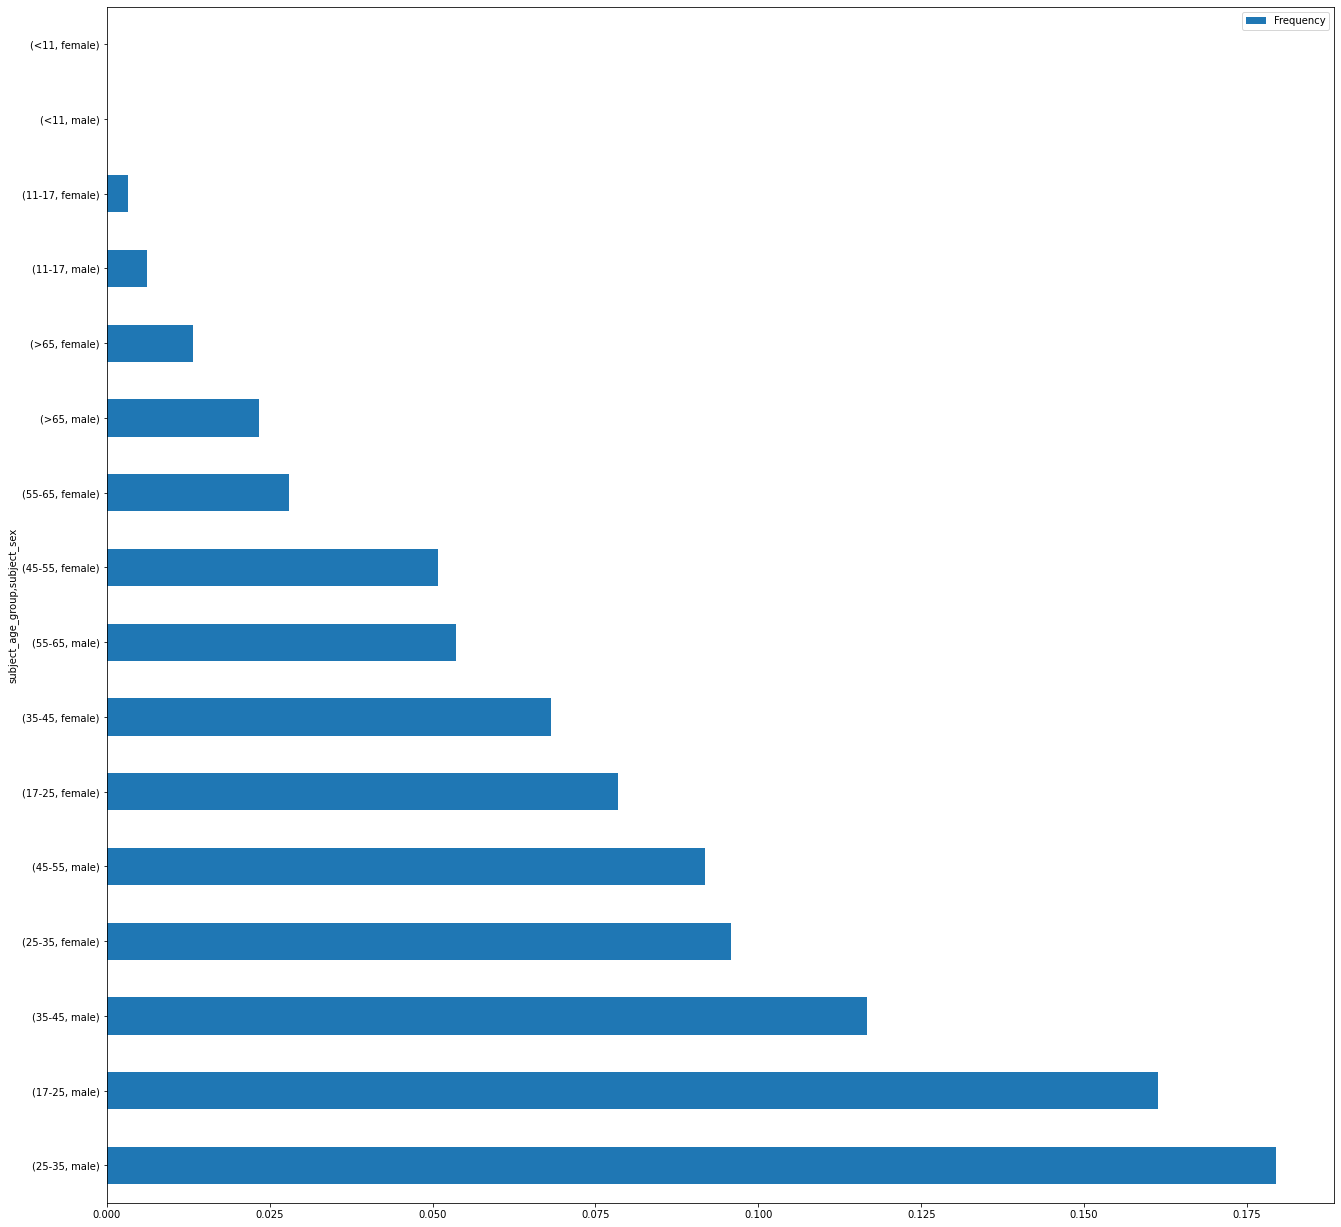

In [19]:
data['Frequency'] = 1
freq_target = data[['subject_age_group', 'subject_sex', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_age_group', 'subject_sex']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));

This bar plot shows the rate of stops for individuals of a particular age and race, and by far the most stopped are white men and hispanic men where y is the individual w.r.t age and race and x is the density

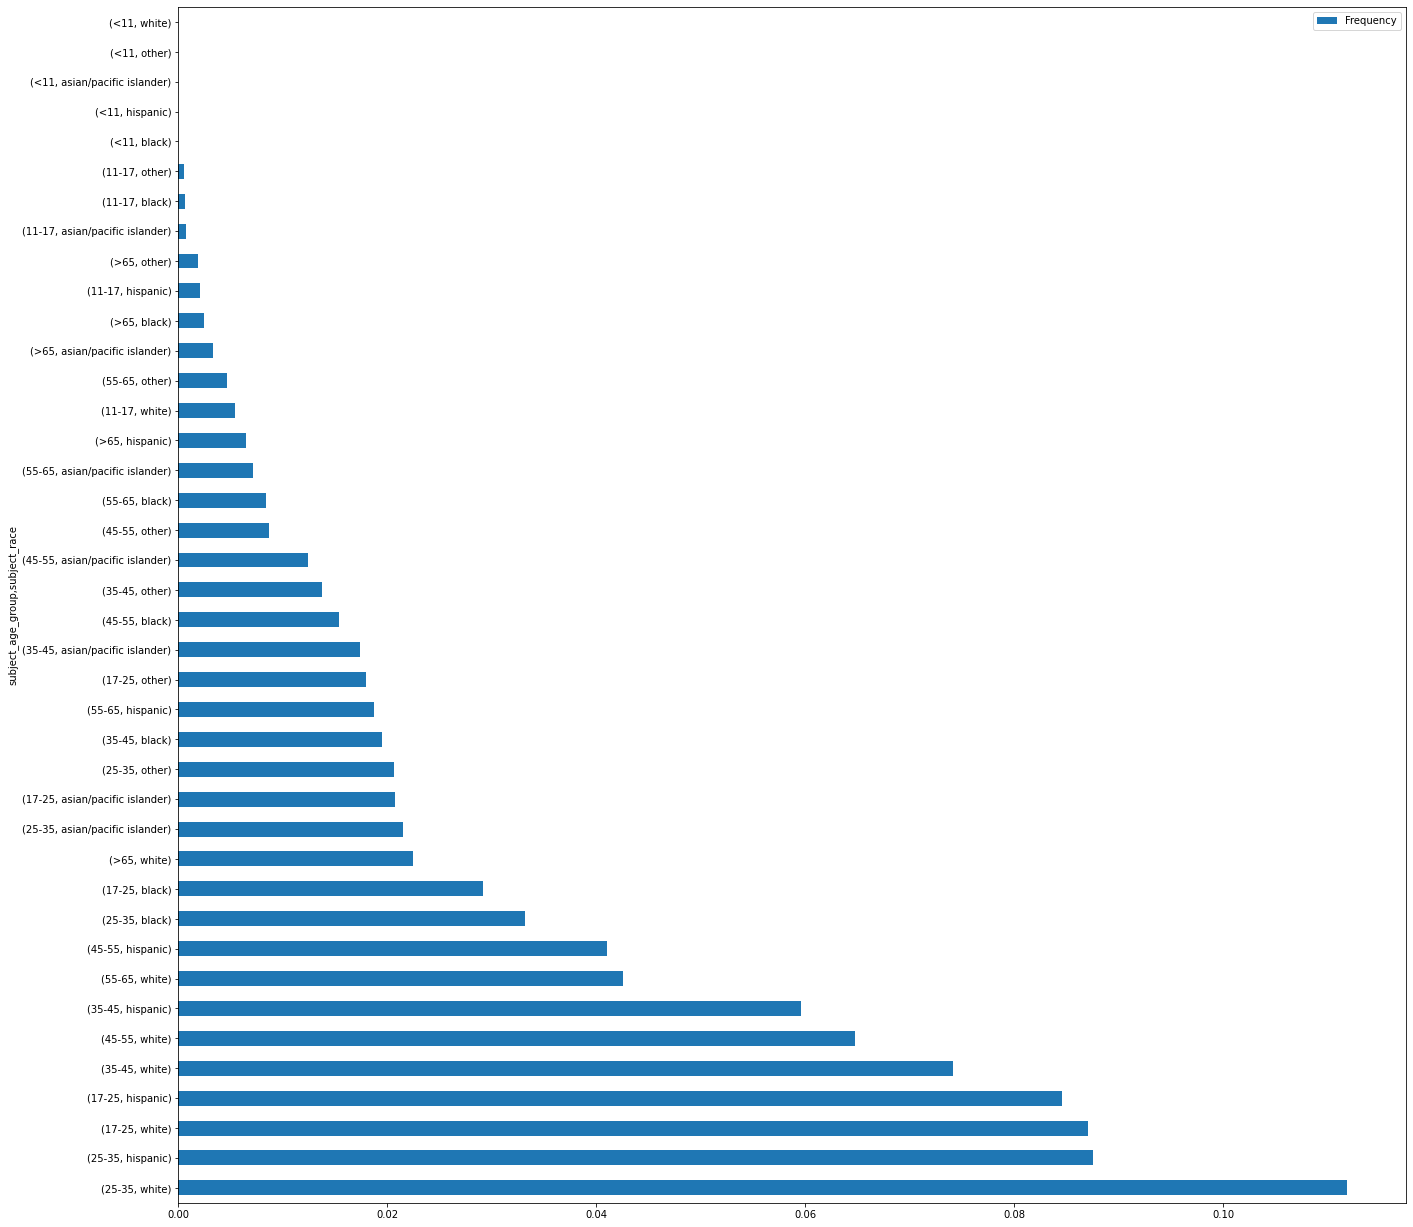

In [20]:
data['Frequency'] = 1
freq_target = data[['subject_age_group', 'subject_race', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_age_group', 'subject_race']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));

This bar plot depicts the rate at which individuals are being stopped by their race, gender, and age. The top 5 most stopped are white and hispanic men and range from young (20s) to middle aged (40s) where y is the individual w.r.t age, gender, and race and x is the density

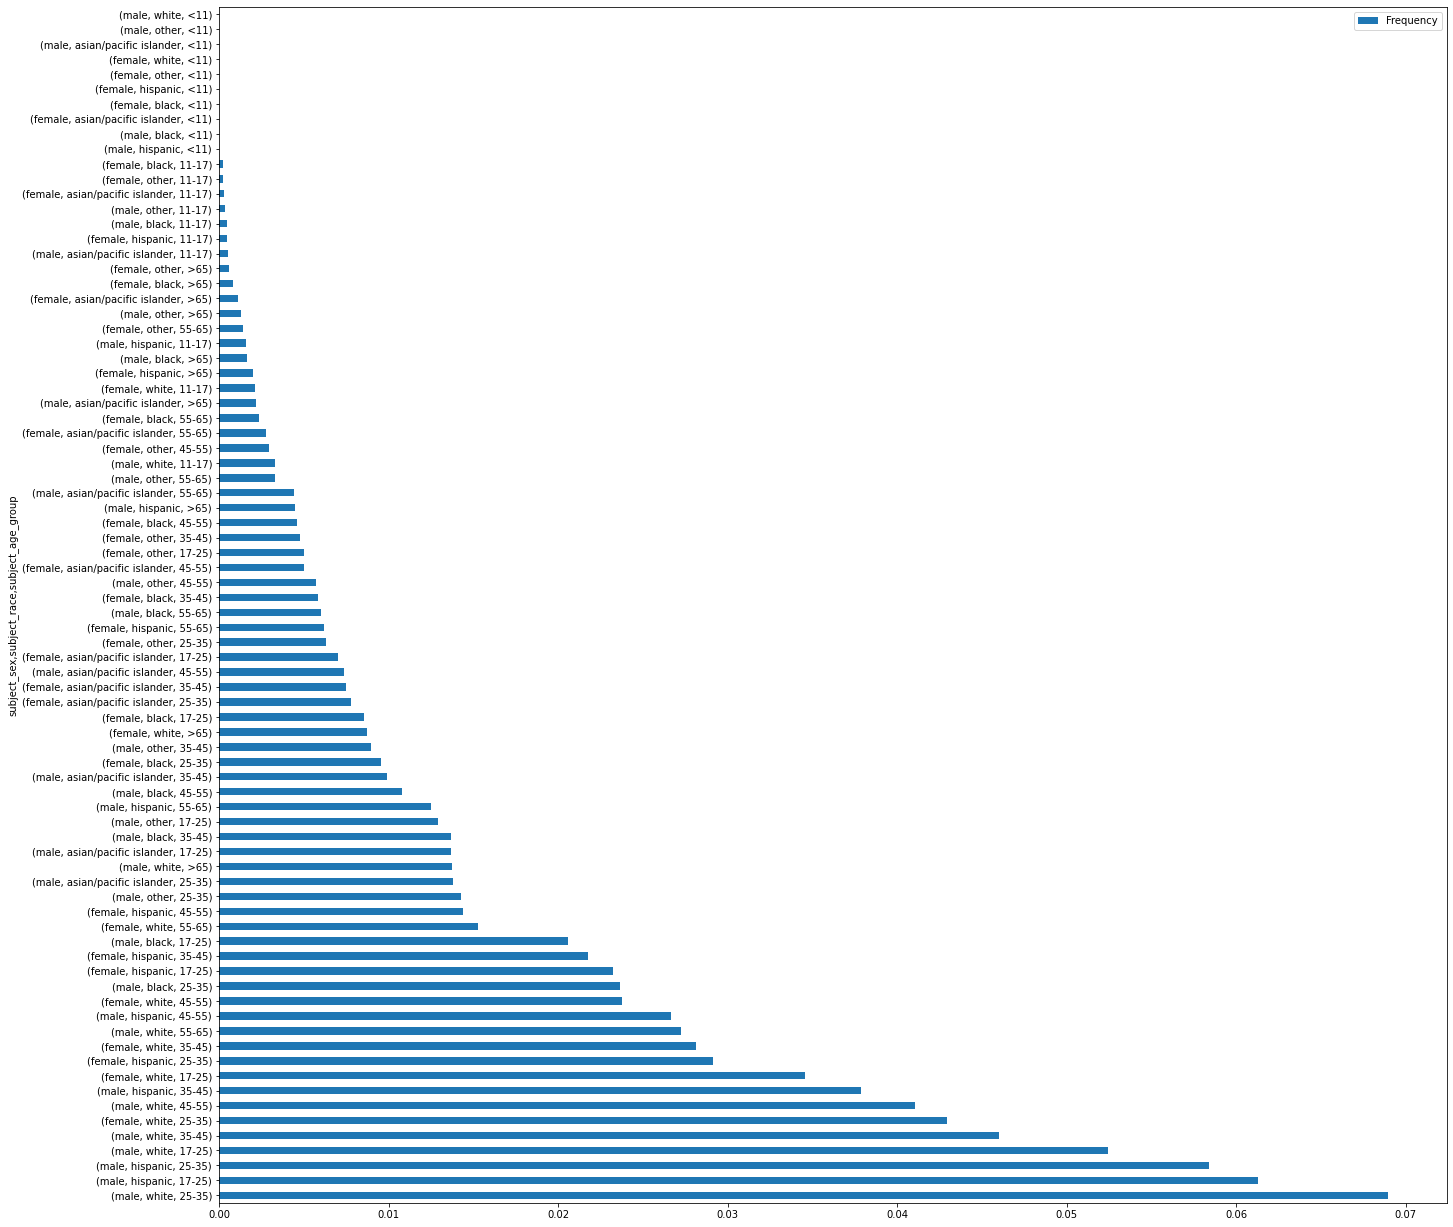

In [21]:
data['Frequency'] = 1
freq_target = data[['subject_sex', 'subject_race', 'subject_age_group', 'Frequency']]
del data['Frequency']
freq_target = freq_target.groupby(by=['subject_sex', 'subject_race', 'subject_age_group']).count() / len(data)
#print(freq_target.sort_values(by='Frequency', ascending=False))
freq_target.sort_values(by='Frequency', ascending=False).plot(kind = 'barh', figsize=(22,22));